# Playing with K-Means

In [1]:
from sklearn import cluster
from numpy import random
from pandas import DataFrame, concat
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
random.seed(1)

In [4]:
classone = DataFrame({
        'x' : random.random(20) + 1,
        'y' : random.random(20) + 1,
        'label' : ['r' for i in range(20)]
    })

In [7]:
classtwo = DataFrame({
        'x' : random.random(20) + 1,
        'y' : random.random(20) + 3,
        'label' : ['g' for i in range(20)]
    })

In [8]:
classthree = DataFrame({
        'x' : random.random(20) + 3,
        'y' : random.random(20) + 1,
        'label' : ['b' for i in range(20)]
    })

In [9]:
classfour = DataFrame({
        'x' : random.random(20) + 3,
        'y' : random.random(20) + 3,
        'label' : ['purple' for i in range(20)]
    })

In [11]:
data = concat([classone, classtwo, classthree, classfour])

In [ ]:
# let visualise

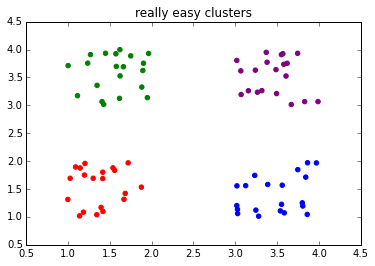

In [13]:
plt.scatter(data.x.values, data.y.values, color = list(data.label.values))
plt.title('really easy clusters')

In [14]:
#so lets run the clustering

In [15]:
cls = cluster.k_means(data[['x','y']].values, 4)

In [16]:
#print cls returns 2 arrays and a float
#the first array is x , y for the centroids of the cluster (remember we asked for 4 above)
# the second one is the cluster values
#the float represents the inertia
print cls

(array([[ 1.36728075,  1.55126409],
       [ 3.45110945,  3.52485124],
       [ 3.47459732,  1.39687035],
       [ 1.56427383,  3.5767669 ]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32), 14.448752612247347)


In [17]:
data['clusters'] = cls[1]
data.head()

,label,x,y,clusters
0,r,1.417022,1.800745,0
1,r,1.720324,1.968262,0
2,r,1.000114,1.313424,0
3,r,1.302333,1.692323,0
4,r,1.146756,1.876389,0


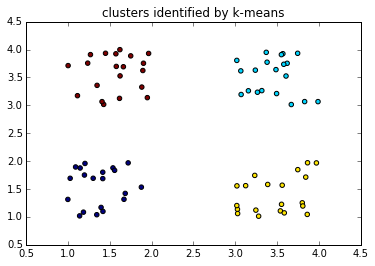

In [18]:
plt.scatter(data.x.values, data.y.values, c = list(data.clusters.values))
plt.title('clusters identified by k-means')

In [19]:
# see that the colour was not given by us - it came from the algorithm

In [27]:
classfive = DataFrame({
        'x' : random.random(50) * 50 + 100,
        'y' : random.random(50) * 50 + 100,
        'label' : ['orange'for i in range(50)]})
data = concat([data, classfive])
cls = cluster.k_means(data[ ['x', 'y'] ].values, 5) # try chaning this last number (the k) to see what happens
data['clusters'] = cls[1]

In [28]:
# lets plot

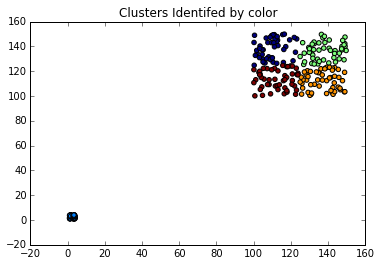

In [29]:
plt.scatter(data.x.values, data.y.values,
            c=list(data.clusters.values))
plt.title('Clusters Identifed by color')
plt.show()

In [31]:
# so class 5 had a different scale so it fucks it up
# remember we dont know the data so if we didnt scale then we would think there is only 2 groups!
# we used a k of 5 because we knew the data

In [34]:
# now lets do this with the Iris dataset

In [33]:
from sklearn import datasets
iris = datasets.load_iris()
cls = cluster.k_means(iris.data, 3)

In [35]:
#Compare the results here. How did K-means do without any data changes?

Iris data application


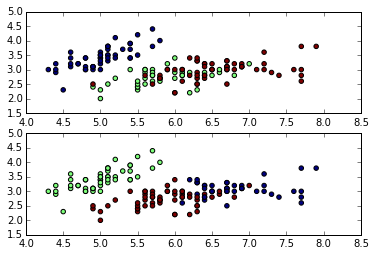

0.5525919445213674

In [36]:
plt.subplot(211)
plt.scatter(iris.data[:,:1], iris.data[:, 1:2],
            cmap=plt.cm.jet, c=iris.target)
plt.subplot(212)
plt.scatter(iris.data[:,:1], iris.data[:, 1:2],
            cmap=plt.cm.jet, c=list(cls[1]))
print"Iris data application"
plt.show()
from sklearn.metrics import silhouette_score
silhouette_score(iris.data, cls[1])

In [37]:
cls

(array([[ 6.85      ,  3.07368421,  5.74210526,  2.07105263],
        [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
        [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
        0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
        2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32),
 78.940841426146079)